### 목표 : 다중 속성/피쳐를 기반으로 수치값 예측

-   데이터 : fish.csv
-   피쳐 : 4개 Length, Diagonal, Height, Width
-   타겟 : : 수치값 Weight
-   학습유형 : 지도학습 + 회귀
-   알고리즘 : 데이터를 확인 후 결정


(1) 모듈로딩 및 데이터 준비 <hr>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn

patch_sklearn()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# 데이터 준비
data_file = "../data/fish.csv"

# Bream 행만 추출 => 35개 행 추출
dataDF = pd.read_csv(data_file, nrows=35, usecols=[1, 2, 3, 4, 5])
dataDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인 <hr>


-   타겟과 피쳐 관계 => 상관계수, 시각화


In [30]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 매개변수 : 행 수, 열 수, 타겟, 피쳐 리스트, 상관계수값
# 반환 : 없음
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx + 1)
        plt.scatter(df[target], df[features[idx]], label=f"{corrs[idx]:.2}")
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()


In [31]:
dataDF.columns[1:]


Index(['Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [32]:
corrList = dataDF.corr()["Weight"].to_list()


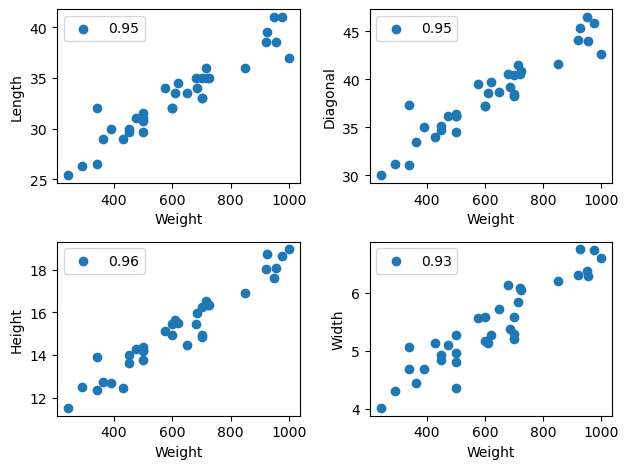

In [33]:
print_feature(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:], corrList[1:])


(3) 학습 준비 <hr>

-   학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
-   학습 데이터 준비 : 피쳐-타겟 분리. 학습용 데이터셋 - 테스트용 데이터셋
-   피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피쳐 스케일링


(3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋, 테스트용 데이터셋


In [35]:
# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
featureDF.head(2)


,Length,Diagonal,Height,Width
0,25.4,30.0,11.52,4.0200
1,26.3,31.2,12.48,4.3056


In [37]:
targetDF = dataDF[dataDF.columns[0]]
targetDF.head(2)


0    242
1    290
Name: Weight, dtype: int64

In [38]:
# 데이터셋 준비 => 70:30
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.3, random_state=7
)


In [40]:
print(f"[훈련용] x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"[테스트용] x_test : {x_test.shape}, y_test : {y_test.shape}")


[훈련용] x_train : (24, 4), y_train : (24,)
[테스트용] x_test : (11, 4), y_test : (11,)


(3-2) 피쳐 스케일링 ==> 훈련 데이터로 생성


In [42]:
scalers = []
scalers.append(StandardScaler())
scalers.append(MinMaxScaler())
scalers.append(RobustScaler())


In [43]:
for scaler in scalers:
    scaler.fit(x_train)


In [44]:
# 3가지 버전의 스케일링된 데이터셋 준비
scaled_x_trains = []
scaled_x_tests = []
for scaler in scalers:
    scaled_x_trains.append(scaler.transform(x_train))
    scaled_x_tests.append(scaler.transform(x_test))


(4) 학습 진행 <hr>


In [51]:
model = LinearRegression()
model.fit(scaled_x_trains[0], y_train)

print(f"[모델파라미터] =====>\ncoef_ : {model.coef_}\nintercept_ : {model.intercept_}")


[모델파라미터] =====>
coef_ : [  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_ : 633.9583333333336


(5) 모델 평가 <hr>

-   훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    -   훈련 점수 > 테스트 점수 : 과대적합
    -   훈련 점수 ▼, 테스트 점수 ▼ : 과소적합
    -   훈련 점수 ≒ 테스트 점수 : 최적적합


In [52]:
train_score = model.score(scaled_x_trains[0], y_train)
test_score = model.score(scaled_x_tests[0], y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")


Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000139


In [113]:
model = LinearRegression()
model.fit(scaled_x_trains[1], y_train)

print(f"[모델파라미터] =====>\ncoef_ : {model.coef_}\nintercept_ : {model.intercept_}")


[모델파라미터] =====>
coef_ : [ 24.4510372  237.85530063 421.56213804 107.59527035]
intercept_ : 233.29753954443683


In [114]:
train_score = model.score(scaled_x_trains[1], y_train)
test_score = model.score(scaled_x_tests[1], y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")


Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000137


In [115]:
model = LinearRegression()
model.fit(scaled_x_trains[2], y_train)

print(f"[모델파라미터] =====>\ncoef_ : {model.coef_}\nintercept_ : {model.intercept_}")


[모델파라미터] =====>
coef_ : [  6.66134026  68.47349563 126.10019259  41.85970066]
intercept_ : 613.6037101327794


In [116]:
train_score = model.score(scaled_x_trains[2], y_train)
test_score = model.score(scaled_x_tests[2], y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")


Train Score : 0.9546390373777778 --- Test Score : 0.9064944670000162


In [111]:
scoreDict = {}
i = 0
model = LinearRegression()
for num in range(10000):
    x_train, x_test, y_train, y_test = train_test_split(
        featureDF, targetDF, test_size=0.3, random_state=num
    )
    for scaler in scalers:
        scaler.fit(x_train)
        scaled_x_train = scaler.transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        model.fit(scaled_x_train, y_train)
        train_score = model.score(scaled_x_train, y_train)
        test_score = model.score(scaled_x_test, y_test)
        diff = abs(test_score - train_score)
        # if (diff < 0.03) and (test_score >= train_score):
        if True:
            scoreDict[i] = (num, scaler, train_score, test_score, diff)
            i += 1


In [112]:
scoreDict


{0: (7,
  StandardScaler(),
  0.9546390373777777,
  0.9064944670000139,
  0.04814457037776376),
 1: (7,
  MinMaxScaler(),
  0.9546390373777777,
  0.9064944670000137,
  0.048144570377763984),
 2: (7,
  RobustScaler(),
  0.9546390373777778,
  0.9064944670000162,
  0.04814457037776154)}

In [69]:
scoreDF = pd.DataFrame(scoreDict).T
scoreDF.columns = ["random_state", "scaler", "train_score", "test_score", "diff"]
scoreDF


,random_state,scaler,train_score,test_score,diff
0,5,StandardScaler(),0.933133,0.959805,0.026671
1,5,MinMaxScaler(),0.933133,0.959805,0.026671
2,5,RobustScaler(),0.933133,0.959805,0.026671
3,8,StandardScaler(),0.931506,0.938346,0.00684
4,8,MinMaxScaler(),0.931506,0.938346,0.00684
...,...,...,...,...,...
4789,9989,MinMaxScaler(),0.930449,0.951421,0.020972
4790,9989,RobustScaler(),0.930449,0.951421,0.020972
4791,9995,StandardScaler(),0.938,0.94652,0.008521
4792,9995,MinMaxScaler(),0.938,0.94652,0.008521


In [98]:
tempDF = scoreDF[(scoreDF["test_score"] > 0.9)].sort_values(by="diff")[:3]
tempDF


,random_state,scaler,train_score,test_score,diff
800,1708,RobustScaler(),0.934442,0.934466,0.000024
798,1708,StandardScaler(),0.934442,0.934466,0.000024
799,1708,MinMaxScaler(),0.934442,0.934466,0.000024


In [106]:
tempList = []
for i in range(10):
    limit = 0.9 + i * 0.01
    tempDF = scoreDF[(scoreDF["test_score"] > limit)].sort_values(by="diff")[:3]
    tempList.append(tempDF)
bestDF = pd.concat(tempList, axis=0)
bestDF.drop_duplicates(inplace=True)
bestDF


,random_state,scaler,train_score,test_score,diff
800,1708,RobustScaler(),0.934442,0.934466,0.000024
798,1708,StandardScaler(),0.934442,0.934466,0.000024
799,1708,MinMaxScaler(),0.934442,0.934466,0.000024
3410,7161,RobustScaler(),0.941351,0.94143,0.00008
3408,7161,StandardScaler(),0.941351,0.94143,0.00008
3409,7161,MinMaxScaler(),0.941351,0.94143,0.00008
337,748,MinMaxScaler(),0.93984,0.950534,0.010694
336,748,StandardScaler(),0.93984,0.950534,0.010694
338,748,RobustScaler(),0.93984,0.950534,0.010694
2032,4317,MinMaxScaler(),0.939092,0.960337,0.021245
